# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   April-2020

In [1]:
# The standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

## Generate and show the data

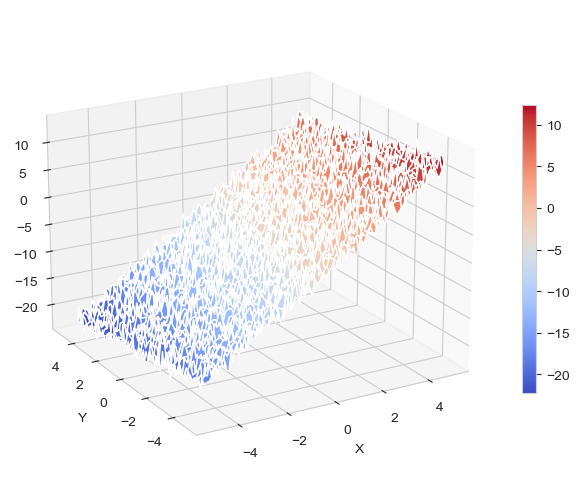

In [2]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.add_axes(Axes3D(fig))
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [3]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z, rcond=None)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[-0.02337713 -0.02299223 -0.02251473 ...  0.01091285  0.01133279
   0.01156043]
 [-0.00489566 -0.00553197 -0.00507161 ... -0.00402258 -0.00504677
  -0.00508385]
 [-0.00489566 -0.00553197 -0.00507161 ... -0.00402258 -0.00504677
  -0.00508385]
 ...
 [-0.11221023 -0.11036269 -0.10807071 ...  0.05238167  0.05439737
   0.05549007]
 [-0.11454794 -0.11266191 -0.11032219 ...  0.05347295  0.05553065
   0.05664611]
 [-0.11688565 -0.11496114 -0.11257366 ...  0.05456424  0.05666393
   0.05780216]]


## Multilinear regression model

In [4]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.065e+05
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:11:44   Log-Likelihood:                -14421.
No. Observations:               10201   AIC:                         2.885e+04
Df Residuals:                   10198   BIC:                         2.887e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9951      0.010   -507.083      0.0